In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

sys.path.append('../src')
from simulation.user_sessions import user_weekly_session_dist, user_weekly_sessions

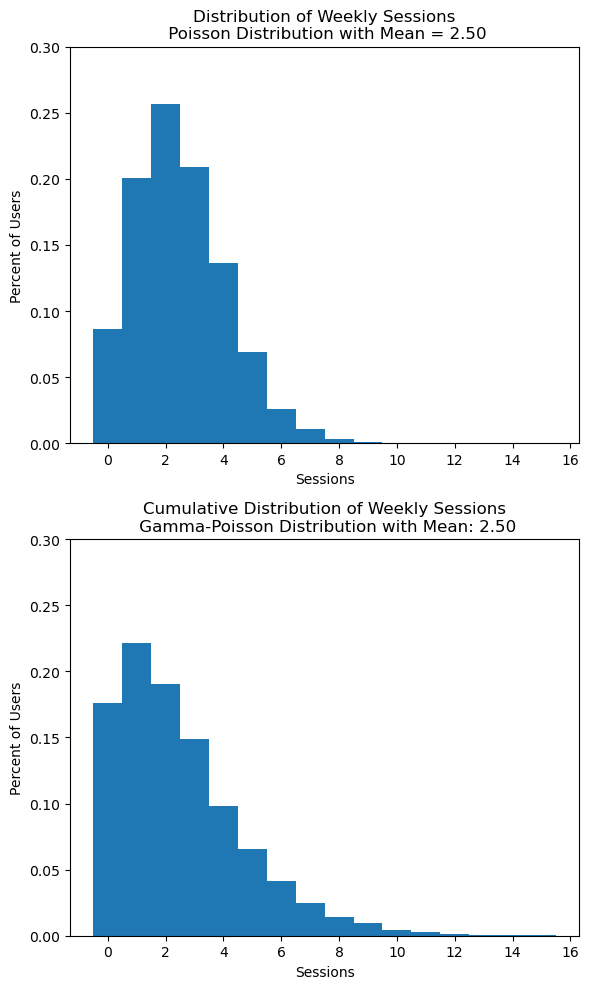

In [3]:
poisson_weekly_user_sessions = []
gamma_poisson_weekly_user_sessions = []

for _ in range(10000):
    lam = user_weekly_session_dist()
    poisson_sessions_capped = min(user_weekly_sessions(2.5), 15)
    poisson_weekly_user_sessions.append(poisson_sessions_capped)
    lam_sessions_capped = min(user_weekly_sessions(lam), 15)
    gamma_poisson_weekly_user_sessions.append(lam_sessions_capped)

poisson_mean = np.mean(poisson_weekly_user_sessions) 
gamma_poisson_mean = np.mean(gamma_poisson_weekly_user_sessions)

fig, axs = plt.subplots(2, 1, figsize=(6,10))

axs[0].hist(poisson_weekly_user_sessions, 
            bins=range(0, 17), 
            align='left', 
            density=True
)
axs[0].set_xlabel('Sessions')
axs[0].set_ylabel('Percent of Users')
axs[0].set_title('Distribution of Weekly Sessions\n Poisson Distribution with Mean = {:.2f}'.format(poisson_mean))
axs[0].set_ylim(0, 0.3)

axs[1].hist(gamma_poisson_weekly_user_sessions, 
            bins=range(0, 17), 
            align='left', 
            density=True
)
axs[1].set_xlabel('Sessions')
axs[1].set_ylabel('Percent of Users')
axs[1].set_title('Cumulative Distribution of Weekly Sessions\n Gamma-Poisson Distribution with Mean: {:.2f}'.format(gamma_poisson_mean))
axs[1].set_ylim(0, 0.3)

plt.tight_layout()
plt.show()

Both distributions produce a sample mean around 2.5. Using the gamma distribution  at $\alpha = 2.5$ and $\theta = 1$ to determine the poisson parameter creates a longer tail at a given mean than using poisson alone at $\lambda = 2.5$. I think the former better models the wider range of user activity such as power users.